In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageEnhance, ImageDraw, ImageFilter
import matplotlib as mpl
#import tensorflow as tf
from matplotlib import patches # ou ImageDraw
import random
import tensorflow as tf
import time


current_path = os.getcwd()
# image_path = os.path.join(current_path,"only_faces","")
image_path = os.path.join("D:\\","FIA","TCC","BASES","Base_crua_com_anotacoes","")
image_destination = os.path.join(current_path,"only_faces","balanced","")
without_mask_path = os.path.join(image_destination,"without_mask","")
mask_weared_incorrect_path = os.path.join(image_destination,"mask_weared_incorrect","")
with_mask_path = os.path.join(image_destination,"with_mask","")
bases_prontas_path = os.path.join(current_path,"bases_prontas","")

In [2]:
"""
devido a problemas de memória fui obrigado a salvar as bases em um outro ssd denominado d:

MemoryError: Unable to allocate 12.2 GiB for an array with shape (21744, 224, 224, 3) and data type float32
"""
bases_prontas_path = os.path.join("D:\\","FIA","TCC","BASES","")
print(bases_prontas_path)

D:\FIA\TCC\BASES\


In [3]:
image_list = [i for i in os.listdir(image_path) if str(i).endswith('.png') or str(i).endswith('.PNG')]
annotation_list = [i for i in os.listdir(image_path) if str(i).endswith('.xml')]
image_dict = {"name":list(), "img":list(), "annotation":list()}
print(f"images: {len(image_list)}\nannotations: {len(annotation_list)}")

images: 2866
annotations: 2866


In [4]:
for i in image_list:
    image_dict["name"].append(str(i)[:-4])
    image_dict["img"].append(str(i))
    image_dict["annotation"].append(str(i)[:-4]+".xml")
#print(image_dict)

In [6]:
#df_imagens = pd.DataFrame(columns=['id','origem','recorte''target'])
total0 = 0
total1 = 0
totaloutros = 0
cut_image_dict = {'filename': list(),"name": list(),"label": list(),"xmin": list(),"ymin": list(),"xmax": list(),"ymax": list()}
for i in range(len(image_list)):
    #le a imagem e a anotacao
    
    annotations = ET.parse(image_path+image_dict["annotation"][i]).getroot()
    for cada_rosto_obj in annotations.iter("object"):
        filename = annotations.find('filename').text
        target = cada_rosto_obj.find('name').text
        bndbox = cada_rosto_obj.find('bndbox')
        cut_image_dict["xmin"].append(int(bndbox.find('xmin').text))
        cut_image_dict["ymin"].append(int(bndbox.find('ymin').text))
        cut_image_dict["xmax"].append(int(bndbox.find('xmax').text))
        cut_image_dict["ymax"].append(int(bndbox.find('ymax').text))
        cut_image_dict["filename"].append(str(filename))
        cut_image_dict["label"].append(target[0])
                 
        if target == "with_mask":
            total1 += 1
            cut_image_dict["name"].append(target+"_"+str(total1))
        elif target == "without_mask":
            total0 += 1
            cut_image_dict["name"].append(target+"_"+str(total0))
        else:
            #print(target[0])
            totaloutros += 1
            cut_image_dict["name"].append(target+"_"+str(totaloutros))


print("with_mask = " + str(total1)) 
print("without_mask = " + str(total0))
print("mask_weared_incorrect = " + str(totaloutros))
print("total geral = " + str(total1+total0+totaloutros))
            

with_mask = 3676
without_mask = 2617
mask_weared_incorrect = 528
total geral = 6821


In [8]:
def crop_and_save_img(img_num,cut_image_dict):
    img = Image.open(image_path+cut_image_dict["filename"][img_num])
    #img.show()
    xmin = cut_image_dict["xmin"][img_num]
    #print(f"xmin = {xmin} do tipo {type(xmin)}")
    ymin = int(cut_image_dict["ymin"][img_num])
    #print(f"ymin = {ymin} do tipo {type(ymin)}")
    xmax = int(cut_image_dict["xmax"][img_num])
    #print(f"xmax = {xmax} do tipo {type(xmax)}")
    ymax = int(cut_image_dict["ymax"][img_num])
    #print(f"ymax = {ymax} do tipo {type(ymax)}")
    #.crop((left, top, right, bottom))
    cropped = img.crop((xmin, ymin, xmax, ymax))
    cropped_np = np.asarray(cropped)
    #cropped.show()
    if(cropped_np.shape[0]>40 and cropped_np.shape[1]>40):
        img_name = cut_image_dict["name"][img_num]+".png"
    elif(cropped_np.shape[0]>20 and cropped_np.shape[1]>20):
        img_name = cut_image_dict["name"][img_num]+"_menor_40x40.png"
    else:
        img_name = cut_image_dict["name"][img_num]+"_menor_20x20.png"
    cropped.save(current_path+"\\only_faces\\"+ img_name)
    print("gerado arquivo " + img_name)
    return cut_image_dict["filename"][img_num], cropped_np.shape

# recorta todos os rostos para podermos tratar cada um individualmente e fazer o data augumentation

In [9]:
total_itens = len(cut_image_dict["name"])
print(f"total de itens = {total_itens}")
dim_faces = {"Name":list(), "tamanho":list()}
for item in range(total_itens):
    N, tam =  crop_and_save_img(item,cut_image_dict)
    dim_faces["Name"].append(N), dim_faces["tamanho"].append(tam)

total de itens = 6821
gerado arquivo without_mask_1.png
gerado arquivo without_mask_2.png
gerado arquivo without_mask_3.png
gerado arquivo without_mask_4.png
gerado arquivo without_mask_5.png
gerado arquivo without_mask_6.png
gerado arquivo without_mask_7.png
gerado arquivo without_mask_8.png
gerado arquivo mask_weared_incorrect_1.png
gerado arquivo mask_weared_incorrect_2.png
gerado arquivo without_mask_9.png
gerado arquivo without_mask_10.png
gerado arquivo without_mask_11.png
gerado arquivo without_mask_12.png
gerado arquivo without_mask_13.png
gerado arquivo without_mask_14.png
gerado arquivo without_mask_15.png
gerado arquivo without_mask_16.png
gerado arquivo without_mask_17.png
gerado arquivo without_mask_18.png
gerado arquivo without_mask_19.png
gerado arquivo without_mask_20.png
gerado arquivo mask_weared_incorrect_3.png
gerado arquivo with_mask_1.png
gerado arquivo with_mask_2.png
gerado arquivo with_mask_3.png
gerado arquivo with_mask_4.png
gerado arquivo with_mask_5.png
ger

gerado arquivo mask_weared_incorrect_126.png
gerado arquivo mask_weared_incorrect_127.png
gerado arquivo with_mask_37.png
gerado arquivo with_mask_38.png
gerado arquivo with_mask_39.png
gerado arquivo with_mask_40.png
gerado arquivo with_mask_41.png
gerado arquivo with_mask_42.png
gerado arquivo with_mask_43_menor_40x40.png
gerado arquivo with_mask_44_menor_40x40.png
gerado arquivo with_mask_45_menor_40x40.png
gerado arquivo mask_weared_incorrect_128.png
gerado arquivo without_mask_48_menor_40x40.png
gerado arquivo without_mask_49_menor_40x40.png
gerado arquivo without_mask_50_menor_40x40.png
gerado arquivo mask_weared_incorrect_129.png
gerado arquivo without_mask_51.png
gerado arquivo without_mask_52_menor_40x40.png
gerado arquivo without_mask_53_menor_40x40.png
gerado arquivo without_mask_54.png
gerado arquivo with_mask_46.png
gerado arquivo with_mask_47.png
gerado arquivo with_mask_48.png
gerado arquivo with_mask_49.png
gerado arquivo with_mask_50.png
gerado arquivo with_mask_51.png

gerado arquivo without_mask_92.png
gerado arquivo without_mask_93.png
gerado arquivo without_mask_94.png
gerado arquivo without_mask_95.png
gerado arquivo without_mask_96.png
gerado arquivo mask_weared_incorrect_160_menor_40x40.png
gerado arquivo with_mask_166_menor_40x40.png
gerado arquivo mask_weared_incorrect_161.png
gerado arquivo mask_weared_incorrect_162.png
gerado arquivo mask_weared_incorrect_163.png
gerado arquivo without_mask_97_menor_40x40.png
gerado arquivo mask_weared_incorrect_164.png
gerado arquivo mask_weared_incorrect_165_menor_40x40.png
gerado arquivo with_mask_167.png
gerado arquivo mask_weared_incorrect_166.png
gerado arquivo mask_weared_incorrect_167.png
gerado arquivo mask_weared_incorrect_168.png
gerado arquivo mask_weared_incorrect_169.png
gerado arquivo mask_weared_incorrect_170_menor_40x40.png
gerado arquivo with_mask_168.png
gerado arquivo with_mask_169.png
gerado arquivo mask_weared_incorrect_171.png
gerado arquivo mask_weared_incorrect_172.png
gerado arquiv

gerado arquivo mask_weared_incorrect_218.png
gerado arquivo with_mask_255.png
gerado arquivo with_mask_256.png
gerado arquivo with_mask_257.png
gerado arquivo with_mask_258.png
gerado arquivo with_mask_259.png
gerado arquivo with_mask_260.png
gerado arquivo with_mask_261.png
gerado arquivo with_mask_262.png
gerado arquivo with_mask_263_menor_20x20.png
gerado arquivo without_mask_147_menor_20x20.png
gerado arquivo without_mask_148_menor_20x20.png
gerado arquivo without_mask_149_menor_20x20.png
gerado arquivo without_mask_150_menor_20x20.png
gerado arquivo without_mask_151_menor_20x20.png
gerado arquivo without_mask_152_menor_20x20.png
gerado arquivo without_mask_153_menor_20x20.png
gerado arquivo without_mask_154_menor_20x20.png
gerado arquivo with_mask_264_menor_40x40.png
gerado arquivo with_mask_265_menor_40x40.png
gerado arquivo with_mask_266_menor_40x40.png
gerado arquivo with_mask_267_menor_40x40.png
gerado arquivo with_mask_268_menor_40x40.png
gerado arquivo mask_weared_incorrect_

gerado arquivo mask_weared_incorrect_250_menor_40x40.png
gerado arquivo with_mask_370_menor_40x40.png
gerado arquivo mask_weared_incorrect_251_menor_40x40.png
gerado arquivo without_mask_207.png
gerado arquivo without_mask_208.png
gerado arquivo without_mask_209.png
gerado arquivo with_mask_371.png
gerado arquivo mask_weared_incorrect_252.png
gerado arquivo mask_weared_incorrect_253.png
gerado arquivo mask_weared_incorrect_254.png
gerado arquivo mask_weared_incorrect_255.png
gerado arquivo without_mask_210_menor_40x40.png
gerado arquivo with_mask_372.png
gerado arquivo without_mask_211_menor_40x40.png
gerado arquivo with_mask_373_menor_40x40.png
gerado arquivo with_mask_374_menor_40x40.png
gerado arquivo with_mask_375_menor_20x20.png
gerado arquivo with_mask_376_menor_40x40.png
gerado arquivo with_mask_377_menor_40x40.png
gerado arquivo with_mask_378_menor_40x40.png
gerado arquivo with_mask_379_menor_20x20.png
gerado arquivo with_mask_380_menor_40x40.png
gerado arquivo without_mask_212

gerado arquivo without_mask_260_menor_40x40.png
gerado arquivo with_mask_496.png
gerado arquivo with_mask_497_menor_40x40.png
gerado arquivo without_mask_261_menor_40x40.png
gerado arquivo with_mask_498_menor_40x40.png
gerado arquivo without_mask_262.png
gerado arquivo with_mask_499_menor_20x20.png
gerado arquivo without_mask_263_menor_20x20.png
gerado arquivo without_mask_264_menor_20x20.png
gerado arquivo mask_weared_incorrect_261.png
gerado arquivo with_mask_500.png
gerado arquivo with_mask_501_menor_40x40.png
gerado arquivo without_mask_265_menor_40x40.png
gerado arquivo with_mask_502_menor_20x20.png
gerado arquivo with_mask_503_menor_40x40.png
gerado arquivo with_mask_504_menor_20x20.png
gerado arquivo without_mask_266_menor_20x20.png
gerado arquivo with_mask_505_menor_20x20.png
gerado arquivo with_mask_506.png
gerado arquivo with_mask_507.png
gerado arquivo with_mask_508.png
gerado arquivo without_mask_267_menor_20x20.png
gerado arquivo without_mask_268_menor_20x20.png
gerado arq

gerado arquivo with_mask_648.png
gerado arquivo with_mask_649.png
gerado arquivo with_mask_650.png
gerado arquivo with_mask_651_menor_40x40.png
gerado arquivo with_mask_652_menor_40x40.png
gerado arquivo with_mask_653_menor_40x40.png
gerado arquivo with_mask_654_menor_40x40.png
gerado arquivo with_mask_655_menor_40x40.png
gerado arquivo with_mask_656_menor_40x40.png
gerado arquivo with_mask_657_menor_40x40.png
gerado arquivo with_mask_658_menor_20x20.png
gerado arquivo mask_weared_incorrect_270_menor_40x40.png
gerado arquivo without_mask_295_menor_40x40.png
gerado arquivo without_mask_296_menor_40x40.png
gerado arquivo without_mask_297_menor_20x20.png
gerado arquivo with_mask_659.png
gerado arquivo with_mask_660.png
gerado arquivo with_mask_661_menor_40x40.png
gerado arquivo without_mask_298_menor_40x40.png
gerado arquivo without_mask_299_menor_20x20.png
gerado arquivo with_mask_662_menor_40x40.png
gerado arquivo with_mask_663_menor_20x20.png
gerado arquivo without_mask_300_menor_20x20

gerado arquivo with_mask_801_menor_20x20.png
gerado arquivo with_mask_802_menor_20x20.png
gerado arquivo with_mask_803_menor_20x20.png
gerado arquivo with_mask_804_menor_20x20.png
gerado arquivo with_mask_805_menor_40x40.png
gerado arquivo with_mask_806_menor_20x20.png
gerado arquivo with_mask_807_menor_40x40.png
gerado arquivo with_mask_808_menor_20x20.png
gerado arquivo with_mask_809_menor_20x20.png
gerado arquivo mask_weared_incorrect_274_menor_20x20.png
gerado arquivo without_mask_332_menor_20x20.png
gerado arquivo without_mask_333_menor_20x20.png
gerado arquivo without_mask_334_menor_20x20.png
gerado arquivo without_mask_335_menor_20x20.png
gerado arquivo with_mask_810_menor_20x20.png
gerado arquivo without_mask_336_menor_20x20.png
gerado arquivo without_mask_337_menor_20x20.png
gerado arquivo without_mask_338_menor_20x20.png
gerado arquivo with_mask_811.png
gerado arquivo with_mask_812.png
gerado arquivo with_mask_813.png
gerado arquivo with_mask_814_menor_40x40.png
gerado arquiv

gerado arquivo with_mask_915_menor_40x40.png
gerado arquivo with_mask_916_menor_40x40.png
gerado arquivo with_mask_917_menor_40x40.png
gerado arquivo with_mask_918_menor_40x40.png
gerado arquivo with_mask_919_menor_40x40.png
gerado arquivo with_mask_920_menor_40x40.png
gerado arquivo without_mask_400.png
gerado arquivo with_mask_921.png
gerado arquivo without_mask_401.png
gerado arquivo without_mask_402.png
gerado arquivo with_mask_922.png
gerado arquivo with_mask_923.png
gerado arquivo without_mask_403_menor_40x40.png
gerado arquivo without_mask_404_menor_20x20.png
gerado arquivo mask_weared_incorrect_276_menor_40x40.png
gerado arquivo mask_weared_incorrect_277.png
gerado arquivo with_mask_924_menor_40x40.png
gerado arquivo with_mask_925_menor_40x40.png
gerado arquivo with_mask_926_menor_40x40.png
gerado arquivo with_mask_927_menor_40x40.png
gerado arquivo with_mask_928_menor_40x40.png
gerado arquivo with_mask_929_menor_40x40.png
gerado arquivo with_mask_930_menor_40x40.png
gerado arq

gerado arquivo with_mask_1077_menor_40x40.png
gerado arquivo with_mask_1078.png
gerado arquivo with_mask_1079.png
gerado arquivo with_mask_1080.png
gerado arquivo with_mask_1081_menor_40x40.png
gerado arquivo with_mask_1082_menor_40x40.png
gerado arquivo with_mask_1083_menor_40x40.png
gerado arquivo without_mask_419_menor_40x40.png
gerado arquivo without_mask_420_menor_20x20.png
gerado arquivo without_mask_421_menor_20x20.png
gerado arquivo with_mask_1084.png
gerado arquivo mask_weared_incorrect_281.png
gerado arquivo with_mask_1085.png
gerado arquivo with_mask_1086.png
gerado arquivo with_mask_1087.png
gerado arquivo mask_weared_incorrect_282.png
gerado arquivo without_mask_422_menor_40x40.png
gerado arquivo with_mask_1088_menor_20x20.png
gerado arquivo with_mask_1089_menor_20x20.png
gerado arquivo with_mask_1090_menor_20x20.png
gerado arquivo with_mask_1091_menor_20x20.png
gerado arquivo with_mask_1092_menor_20x20.png
gerado arquivo with_mask_1093_menor_20x20.png
gerado arquivo with_

gerado arquivo with_mask_1220_menor_40x40.png
gerado arquivo with_mask_1221.png
gerado arquivo with_mask_1222_menor_40x40.png
gerado arquivo with_mask_1223_menor_40x40.png
gerado arquivo with_mask_1224_menor_40x40.png
gerado arquivo with_mask_1225_menor_40x40.png
gerado arquivo with_mask_1226_menor_40x40.png
gerado arquivo with_mask_1227_menor_20x20.png
gerado arquivo with_mask_1228_menor_20x20.png
gerado arquivo with_mask_1229_menor_20x20.png
gerado arquivo with_mask_1230_menor_20x20.png
gerado arquivo with_mask_1231_menor_20x20.png
gerado arquivo with_mask_1232_menor_20x20.png
gerado arquivo with_mask_1233_menor_20x20.png
gerado arquivo without_mask_455_menor_20x20.png
gerado arquivo with_mask_1234.png
gerado arquivo with_mask_1235.png
gerado arquivo without_mask_456_menor_20x20.png
gerado arquivo with_mask_1236_menor_20x20.png
gerado arquivo with_mask_1237_menor_20x20.png
gerado arquivo with_mask_1238.png
gerado arquivo with_mask_1239_menor_40x40.png
gerado arquivo with_mask_1240_me

gerado arquivo with_mask_1364.png
gerado arquivo without_mask_494_menor_40x40.png
gerado arquivo with_mask_1365_menor_20x20.png
gerado arquivo with_mask_1366_menor_20x20.png
gerado arquivo with_mask_1367_menor_20x20.png
gerado arquivo with_mask_1368_menor_40x40.png
gerado arquivo with_mask_1369_menor_40x40.png
gerado arquivo with_mask_1370_menor_20x20.png
gerado arquivo with_mask_1371_menor_20x20.png
gerado arquivo with_mask_1372_menor_20x20.png
gerado arquivo with_mask_1373_menor_20x20.png
gerado arquivo with_mask_1374_menor_40x40.png
gerado arquivo with_mask_1375.png
gerado arquivo with_mask_1376_menor_40x40.png
gerado arquivo without_mask_495.png
gerado arquivo with_mask_1377_menor_20x20.png
gerado arquivo with_mask_1378_menor_20x20.png
gerado arquivo with_mask_1379_menor_40x40.png
gerado arquivo with_mask_1380_menor_40x40.png
gerado arquivo with_mask_1381_menor_40x40.png
gerado arquivo without_mask_496_menor_40x40.png
gerado arquivo with_mask_1382.png
gerado arquivo with_mask_1383.

gerado arquivo without_mask_523_menor_20x20.png
gerado arquivo with_mask_1535_menor_20x20.png
gerado arquivo with_mask_1536_menor_20x20.png
gerado arquivo with_mask_1537_menor_40x40.png
gerado arquivo with_mask_1538_menor_20x20.png
gerado arquivo without_mask_524_menor_40x40.png
gerado arquivo with_mask_1539_menor_40x40.png
gerado arquivo without_mask_525_menor_20x20.png
gerado arquivo without_mask_526_menor_20x20.png
gerado arquivo without_mask_527_menor_20x20.png
gerado arquivo with_mask_1540_menor_20x20.png
gerado arquivo with_mask_1541_menor_20x20.png
gerado arquivo with_mask_1542_menor_20x20.png
gerado arquivo mask_weared_incorrect_298_menor_40x40.png
gerado arquivo without_mask_528_menor_40x40.png
gerado arquivo without_mask_529_menor_20x20.png
gerado arquivo without_mask_530_menor_20x20.png
gerado arquivo with_mask_1543_menor_20x20.png
gerado arquivo with_mask_1544.png
gerado arquivo with_mask_1545.png
gerado arquivo with_mask_1546.png
gerado arquivo with_mask_1547.png
gerado ar

gerado arquivo with_mask_1690_menor_20x20.png
gerado arquivo with_mask_1691_menor_20x20.png
gerado arquivo with_mask_1692_menor_20x20.png
gerado arquivo with_mask_1693_menor_20x20.png
gerado arquivo with_mask_1694_menor_20x20.png
gerado arquivo with_mask_1695_menor_20x20.png
gerado arquivo with_mask_1696_menor_20x20.png
gerado arquivo without_mask_554_menor_20x20.png
gerado arquivo with_mask_1697_menor_20x20.png
gerado arquivo with_mask_1698_menor_20x20.png
gerado arquivo with_mask_1699_menor_20x20.png
gerado arquivo with_mask_1700_menor_20x20.png
gerado arquivo with_mask_1701_menor_20x20.png
gerado arquivo with_mask_1702_menor_20x20.png
gerado arquivo with_mask_1703.png
gerado arquivo with_mask_1704.png
gerado arquivo with_mask_1705.png
gerado arquivo with_mask_1706_menor_20x20.png
gerado arquivo with_mask_1707_menor_40x40.png
gerado arquivo with_mask_1708.png
gerado arquivo with_mask_1709_menor_40x40.png
gerado arquivo with_mask_1710_menor_40x40.png
gerado arquivo with_mask_1711_meno

gerado arquivo with_mask_1844_menor_40x40.png
gerado arquivo with_mask_1845_menor_20x20.png
gerado arquivo with_mask_1846_menor_20x20.png
gerado arquivo with_mask_1847_menor_20x20.png
gerado arquivo with_mask_1848_menor_20x20.png
gerado arquivo with_mask_1849_menor_40x40.png
gerado arquivo with_mask_1850_menor_20x20.png
gerado arquivo without_mask_583_menor_20x20.png
gerado arquivo with_mask_1851_menor_40x40.png
gerado arquivo with_mask_1852_menor_20x20.png
gerado arquivo with_mask_1853_menor_40x40.png
gerado arquivo with_mask_1854_menor_20x20.png
gerado arquivo with_mask_1855_menor_20x20.png
gerado arquivo without_mask_584_menor_20x20.png
gerado arquivo with_mask_1856_menor_20x20.png
gerado arquivo with_mask_1857_menor_40x40.png
gerado arquivo without_mask_585_menor_20x20.png
gerado arquivo with_mask_1858_menor_20x20.png
gerado arquivo with_mask_1859_menor_20x20.png
gerado arquivo with_mask_1860.png
gerado arquivo with_mask_1861.png
gerado arquivo with_mask_1862_menor_40x40.png
gerado

gerado arquivo with_mask_1986.png
gerado arquivo with_mask_1987.png
gerado arquivo with_mask_1988.png
gerado arquivo with_mask_1989.png
gerado arquivo with_mask_1990.png
gerado arquivo with_mask_1991.png
gerado arquivo with_mask_1992_menor_40x40.png
gerado arquivo with_mask_1993.png
gerado arquivo without_mask_627.png
gerado arquivo with_mask_1994.png
gerado arquivo with_mask_1995_menor_40x40.png
gerado arquivo with_mask_1996_menor_40x40.png
gerado arquivo with_mask_1997_menor_40x40.png
gerado arquivo with_mask_1998.png
gerado arquivo with_mask_1999_menor_40x40.png
gerado arquivo with_mask_2000_menor_20x20.png
gerado arquivo with_mask_2001_menor_40x40.png
gerado arquivo with_mask_2002_menor_40x40.png
gerado arquivo with_mask_2003_menor_20x20.png
gerado arquivo with_mask_2004_menor_40x40.png
gerado arquivo with_mask_2005_menor_20x20.png
gerado arquivo with_mask_2006_menor_40x40.png
gerado arquivo with_mask_2007_menor_40x40.png
gerado arquivo with_mask_2008_menor_40x40.png
gerado arquivo

gerado arquivo with_mask_2143_menor_40x40.png
gerado arquivo with_mask_2144_menor_40x40.png
gerado arquivo with_mask_2145_menor_20x20.png
gerado arquivo with_mask_2146_menor_40x40.png
gerado arquivo with_mask_2147_menor_20x20.png
gerado arquivo with_mask_2148_menor_40x40.png
gerado arquivo with_mask_2149_menor_40x40.png
gerado arquivo with_mask_2150_menor_40x40.png
gerado arquivo with_mask_2151_menor_40x40.png
gerado arquivo with_mask_2152_menor_40x40.png
gerado arquivo with_mask_2153_menor_40x40.png
gerado arquivo with_mask_2154_menor_40x40.png
gerado arquivo with_mask_2155_menor_40x40.png
gerado arquivo with_mask_2156_menor_20x20.png
gerado arquivo with_mask_2157_menor_20x20.png
gerado arquivo with_mask_2158_menor_40x40.png
gerado arquivo mask_weared_incorrect_322.png
gerado arquivo without_mask_656_menor_40x40.png
gerado arquivo with_mask_2159_menor_40x40.png
gerado arquivo with_mask_2160_menor_40x40.png
gerado arquivo without_mask_657_menor_40x40.png
gerado arquivo without_mask_658

gerado arquivo with_mask_2293_menor_20x20.png
gerado arquivo with_mask_2294_menor_20x20.png
gerado arquivo with_mask_2295_menor_20x20.png
gerado arquivo with_mask_2296_menor_20x20.png
gerado arquivo with_mask_2297.png
gerado arquivo with_mask_2298_menor_20x20.png
gerado arquivo without_mask_697_menor_20x20.png
gerado arquivo without_mask_698_menor_20x20.png
gerado arquivo without_mask_699_menor_20x20.png
gerado arquivo with_mask_2299.png
gerado arquivo with_mask_2300_menor_40x40.png
gerado arquivo without_mask_700.png
gerado arquivo mask_weared_incorrect_327.png
gerado arquivo with_mask_2301.png
gerado arquivo with_mask_2302_menor_40x40.png
gerado arquivo without_mask_701.png
gerado arquivo with_mask_2303_menor_40x40.png
gerado arquivo mask_weared_incorrect_328_menor_20x20.png
gerado arquivo without_mask_702_menor_20x20.png
gerado arquivo with_mask_2304_menor_20x20.png
gerado arquivo with_mask_2305_menor_20x20.png
gerado arquivo with_mask_2306_menor_20x20.png
gerado arquivo with_mask_2

gerado arquivo with_mask_2455_menor_20x20.png
gerado arquivo with_mask_2456_menor_20x20.png
gerado arquivo without_mask_730_menor_20x20.png
gerado arquivo with_mask_2457_menor_20x20.png
gerado arquivo without_mask_731_menor_20x20.png
gerado arquivo with_mask_2458_menor_20x20.png
gerado arquivo without_mask_732_menor_20x20.png
gerado arquivo mask_weared_incorrect_330_menor_20x20.png
gerado arquivo with_mask_2459_menor_20x20.png
gerado arquivo with_mask_2460_menor_20x20.png
gerado arquivo with_mask_2461_menor_20x20.png
gerado arquivo with_mask_2462_menor_20x20.png
gerado arquivo with_mask_2463_menor_20x20.png
gerado arquivo with_mask_2464_menor_20x20.png
gerado arquivo without_mask_733_menor_20x20.png
gerado arquivo with_mask_2465_menor_20x20.png
gerado arquivo with_mask_2466_menor_20x20.png
gerado arquivo with_mask_2467_menor_20x20.png
gerado arquivo without_mask_734_menor_20x20.png
gerado arquivo without_mask_735_menor_20x20.png
gerado arquivo with_mask_2468_menor_20x20.png
gerado arqu

gerado arquivo with_mask_2610_menor_20x20.png
gerado arquivo with_mask_2611_menor_20x20.png
gerado arquivo with_mask_2612_menor_40x40.png
gerado arquivo with_mask_2613_menor_20x20.png
gerado arquivo with_mask_2614_menor_40x40.png
gerado arquivo with_mask_2615_menor_40x40.png
gerado arquivo with_mask_2616_menor_40x40.png
gerado arquivo with_mask_2617_menor_20x20.png
gerado arquivo with_mask_2618_menor_20x20.png
gerado arquivo with_mask_2619_menor_40x40.png
gerado arquivo with_mask_2620_menor_40x40.png
gerado arquivo with_mask_2621_menor_20x20.png
gerado arquivo with_mask_2622_menor_20x20.png
gerado arquivo with_mask_2623_menor_20x20.png
gerado arquivo with_mask_2624_menor_20x20.png
gerado arquivo without_mask_758.png
gerado arquivo with_mask_2625.png
gerado arquivo with_mask_2626.png
gerado arquivo without_mask_759_menor_40x40.png
gerado arquivo without_mask_760_menor_20x20.png
gerado arquivo without_mask_761_menor_20x20.png
gerado arquivo with_mask_2627_menor_40x40.png
gerado arquivo w

gerado arquivo with_mask_2767.png
gerado arquivo with_mask_2768.png
gerado arquivo with_mask_2769.png
gerado arquivo with_mask_2770.png
gerado arquivo with_mask_2771.png
gerado arquivo with_mask_2772_menor_20x20.png
gerado arquivo with_mask_2773_menor_20x20.png
gerado arquivo with_mask_2774_menor_20x20.png
gerado arquivo with_mask_2775_menor_20x20.png
gerado arquivo with_mask_2776_menor_40x40.png
gerado arquivo with_mask_2777_menor_40x40.png
gerado arquivo with_mask_2778_menor_40x40.png
gerado arquivo with_mask_2779_menor_20x20.png
gerado arquivo with_mask_2780.png
gerado arquivo with_mask_2781_menor_40x40.png
gerado arquivo with_mask_2782_menor_40x40.png
gerado arquivo with_mask_2783_menor_40x40.png
gerado arquivo with_mask_2784_menor_40x40.png
gerado arquivo mask_weared_incorrect_346_menor_40x40.png
gerado arquivo without_mask_786.png
gerado arquivo without_mask_787_menor_40x40.png
gerado arquivo without_mask_788_menor_40x40.png
gerado arquivo without_mask_789_menor_40x40.png
gerado 

gerado arquivo without_mask_816_menor_40x40.png
gerado arquivo without_mask_817_menor_40x40.png
gerado arquivo with_mask_2920.png
gerado arquivo with_mask_2921_menor_40x40.png
gerado arquivo with_mask_2922_menor_40x40.png
gerado arquivo with_mask_2923_menor_40x40.png
gerado arquivo without_mask_818.png
gerado arquivo with_mask_2924.png
gerado arquivo with_mask_2925_menor_40x40.png
gerado arquivo with_mask_2926.png
gerado arquivo with_mask_2927.png
gerado arquivo mask_weared_incorrect_354_menor_40x40.png
gerado arquivo with_mask_2928_menor_40x40.png
gerado arquivo with_mask_2929_menor_40x40.png
gerado arquivo with_mask_2930.png
gerado arquivo with_mask_2931_menor_40x40.png
gerado arquivo with_mask_2932.png
gerado arquivo without_mask_819_menor_40x40.png
gerado arquivo with_mask_2933.png
gerado arquivo without_mask_820_menor_40x40.png
gerado arquivo without_mask_821.png
gerado arquivo with_mask_2934_menor_40x40.png
gerado arquivo with_mask_2935_menor_40x40.png
gerado arquivo without_mask

gerado arquivo without_mask_875_menor_20x20.png
gerado arquivo without_mask_876_menor_20x20.png
gerado arquivo without_mask_877_menor_20x20.png
gerado arquivo without_mask_878_menor_20x20.png
gerado arquivo with_mask_3219_menor_20x20.png
gerado arquivo without_mask_879_menor_20x20.png
gerado arquivo without_mask_880_menor_20x20.png
gerado arquivo without_mask_881_menor_20x20.png
gerado arquivo without_mask_882_menor_20x20.png
gerado arquivo without_mask_883_menor_20x20.png
gerado arquivo with_mask_3220_menor_40x40.png
gerado arquivo with_mask_3221.png
gerado arquivo with_mask_3222.png
gerado arquivo with_mask_3223.png
gerado arquivo with_mask_3224.png
gerado arquivo with_mask_3225_menor_40x40.png
gerado arquivo with_mask_3226_menor_40x40.png
gerado arquivo with_mask_3227.png
gerado arquivo with_mask_3228_menor_40x40.png
gerado arquivo with_mask_3229_menor_40x40.png
gerado arquivo with_mask_3230_menor_40x40.png
gerado arquivo with_mask_3231_menor_40x40.png
gerado arquivo without_mask_88

gerado arquivo with_mask_3388_menor_20x20.png
gerado arquivo with_mask_3389_menor_20x20.png
gerado arquivo with_mask_3390_menor_20x20.png
gerado arquivo with_mask_3391_menor_20x20.png
gerado arquivo with_mask_3392_menor_20x20.png
gerado arquivo with_mask_3393_menor_20x20.png
gerado arquivo mask_weared_incorrect_369_menor_20x20.png
gerado arquivo with_mask_3394_menor_40x40.png
gerado arquivo with_mask_3395_menor_40x40.png
gerado arquivo with_mask_3396.png
gerado arquivo without_mask_899.png
gerado arquivo with_mask_3397.png
gerado arquivo with_mask_3398.png
gerado arquivo with_mask_3399.png
gerado arquivo with_mask_3400.png
gerado arquivo with_mask_3401.png
gerado arquivo with_mask_3402.png
gerado arquivo with_mask_3403.png
gerado arquivo with_mask_3404.png
gerado arquivo with_mask_3405.png
gerado arquivo with_mask_3406.png
gerado arquivo with_mask_3407.png
gerado arquivo with_mask_3408.png
gerado arquivo mask_weared_incorrect_370_menor_40x40.png
gerado arquivo with_mask_3409_menor_40x4

gerado arquivo with_mask_3554_menor_20x20.png
gerado arquivo with_mask_3555_menor_20x20.png
gerado arquivo with_mask_3556_menor_20x20.png
gerado arquivo with_mask_3557.png
gerado arquivo with_mask_3558_menor_20x20.png
gerado arquivo with_mask_3559_menor_20x20.png
gerado arquivo with_mask_3560_menor_20x20.png
gerado arquivo with_mask_3561_menor_20x20.png
gerado arquivo mask_weared_incorrect_376.png
gerado arquivo without_mask_921_menor_40x40.png
gerado arquivo with_mask_3562_menor_40x40.png
gerado arquivo with_mask_3563_menor_40x40.png
gerado arquivo with_mask_3564_menor_40x40.png
gerado arquivo with_mask_3565_menor_40x40.png
gerado arquivo with_mask_3566_menor_40x40.png
gerado arquivo with_mask_3567_menor_40x40.png
gerado arquivo with_mask_3568_menor_40x40.png
gerado arquivo with_mask_3569_menor_20x20.png
gerado arquivo with_mask_3570_menor_40x40.png
gerado arquivo with_mask_3571.png
gerado arquivo with_mask_3572.png
gerado arquivo with_mask_3573.png
gerado arquivo with_mask_3574.png
g

gerado arquivo mask_weared_incorrect_449.png
gerado arquivo mask_weared_incorrect_450.png
gerado arquivo mask_weared_incorrect_451.png
gerado arquivo mask_weared_incorrect_452.png
gerado arquivo mask_weared_incorrect_453.png
gerado arquivo mask_weared_incorrect_454.png
gerado arquivo mask_weared_incorrect_455.png
gerado arquivo mask_weared_incorrect_456.png
gerado arquivo mask_weared_incorrect_457.png
gerado arquivo mask_weared_incorrect_458.png
gerado arquivo mask_weared_incorrect_459.png
gerado arquivo with_mask_3665.png
gerado arquivo without_mask_933.png
gerado arquivo with_mask_3666.png
gerado arquivo mask_weared_incorrect_460.png
gerado arquivo mask_weared_incorrect_461.png
gerado arquivo mask_weared_incorrect_462.png
gerado arquivo mask_weared_incorrect_463.png
gerado arquivo mask_weared_incorrect_464.png
gerado arquivo mask_weared_incorrect_465.png
gerado arquivo mask_weared_incorrect_466.png
gerado arquivo mask_weared_incorrect_467.png
gerado arquivo mask_weared_incorrect_468.

gerado arquivo without_mask_1287.png
gerado arquivo without_mask_1288.png
gerado arquivo without_mask_1289.png
gerado arquivo without_mask_1290.png
gerado arquivo without_mask_1291.png
gerado arquivo without_mask_1292.png
gerado arquivo without_mask_1293.png
gerado arquivo without_mask_1294.png
gerado arquivo without_mask_1295.png
gerado arquivo without_mask_1296.png
gerado arquivo without_mask_1297.png
gerado arquivo without_mask_1298.png
gerado arquivo without_mask_1299.png
gerado arquivo without_mask_1300.png
gerado arquivo without_mask_1301.png
gerado arquivo without_mask_1302.png
gerado arquivo without_mask_1303.png
gerado arquivo without_mask_1304.png
gerado arquivo without_mask_1305.png
gerado arquivo without_mask_1306.png
gerado arquivo without_mask_1307.png
gerado arquivo without_mask_1308.png
gerado arquivo without_mask_1309.png
gerado arquivo without_mask_1310.png
gerado arquivo without_mask_1311.png
gerado arquivo without_mask_1312.png
gerado arquivo without_mask_1313.png
g

gerado arquivo without_mask_1516.png
gerado arquivo without_mask_1517.png
gerado arquivo without_mask_1518.png
gerado arquivo without_mask_1519.png
gerado arquivo without_mask_1520.png
gerado arquivo without_mask_1521.png
gerado arquivo without_mask_1522.png
gerado arquivo without_mask_1523.png
gerado arquivo without_mask_1524.png
gerado arquivo without_mask_1525.png
gerado arquivo without_mask_1526.png
gerado arquivo without_mask_1527.png
gerado arquivo without_mask_1528.png
gerado arquivo without_mask_1529.png
gerado arquivo without_mask_1530.png
gerado arquivo without_mask_1531.png
gerado arquivo without_mask_1532.png
gerado arquivo without_mask_1533.png
gerado arquivo without_mask_1534.png
gerado arquivo without_mask_1535.png
gerado arquivo without_mask_1536.png
gerado arquivo without_mask_1537.png
gerado arquivo without_mask_1538.png
gerado arquivo without_mask_1539.png
gerado arquivo without_mask_1540.png
gerado arquivo without_mask_1541.png
gerado arquivo without_mask_1542.png
g

gerado arquivo without_mask_1746.png
gerado arquivo without_mask_1747.png
gerado arquivo without_mask_1748.png
gerado arquivo without_mask_1749.png
gerado arquivo without_mask_1750.png
gerado arquivo without_mask_1751.png
gerado arquivo without_mask_1752.png
gerado arquivo without_mask_1753.png
gerado arquivo without_mask_1754.png
gerado arquivo without_mask_1755.png
gerado arquivo without_mask_1756.png
gerado arquivo without_mask_1757.png
gerado arquivo without_mask_1758.png
gerado arquivo without_mask_1759.png
gerado arquivo without_mask_1760.png
gerado arquivo without_mask_1761.png
gerado arquivo without_mask_1762.png
gerado arquivo without_mask_1763.png
gerado arquivo without_mask_1764.png
gerado arquivo without_mask_1765.png
gerado arquivo without_mask_1766.png
gerado arquivo without_mask_1767.png
gerado arquivo without_mask_1768.png
gerado arquivo without_mask_1769.png
gerado arquivo without_mask_1770.png
gerado arquivo without_mask_1771.png
gerado arquivo without_mask_1772.png
g

gerado arquivo without_mask_1976.png
gerado arquivo without_mask_1977.png
gerado arquivo without_mask_1978.png
gerado arquivo without_mask_1979.png
gerado arquivo without_mask_1980.png
gerado arquivo without_mask_1981.png
gerado arquivo without_mask_1982.png
gerado arquivo without_mask_1983.png
gerado arquivo without_mask_1984.png
gerado arquivo without_mask_1985.png
gerado arquivo without_mask_1986.png
gerado arquivo without_mask_1987.png
gerado arquivo without_mask_1988.png
gerado arquivo without_mask_1989.png
gerado arquivo without_mask_1990.png
gerado arquivo without_mask_1991.png
gerado arquivo without_mask_1992.png
gerado arquivo without_mask_1993.png
gerado arquivo without_mask_1994.png
gerado arquivo without_mask_1995.png
gerado arquivo without_mask_1996.png
gerado arquivo without_mask_1997.png
gerado arquivo without_mask_1998.png
gerado arquivo without_mask_1999.png
gerado arquivo without_mask_2000.png
gerado arquivo without_mask_2001.png
gerado arquivo without_mask_2002.png
g

gerado arquivo without_mask_2209.png
gerado arquivo without_mask_2210.png
gerado arquivo without_mask_2211.png
gerado arquivo without_mask_2212.png
gerado arquivo without_mask_2213.png
gerado arquivo without_mask_2214.png
gerado arquivo without_mask_2215.png
gerado arquivo without_mask_2216.png
gerado arquivo without_mask_2217.png
gerado arquivo without_mask_2218.png
gerado arquivo without_mask_2219.png
gerado arquivo without_mask_2220.png
gerado arquivo without_mask_2221.png
gerado arquivo without_mask_2222.png
gerado arquivo without_mask_2223.png
gerado arquivo without_mask_2224.png
gerado arquivo without_mask_2225.png
gerado arquivo without_mask_2226.png
gerado arquivo without_mask_2227.png
gerado arquivo without_mask_2228.png
gerado arquivo without_mask_2229.png
gerado arquivo without_mask_2230.png
gerado arquivo without_mask_2231.png
gerado arquivo without_mask_2232.png
gerado arquivo without_mask_2233.png
gerado arquivo without_mask_2234.png
gerado arquivo without_mask_2235.png
g

gerado arquivo without_mask_2438.png
gerado arquivo without_mask_2439.png
gerado arquivo without_mask_2440.png
gerado arquivo without_mask_2441.png
gerado arquivo without_mask_2442.png
gerado arquivo without_mask_2443.png
gerado arquivo without_mask_2444.png
gerado arquivo without_mask_2445.png
gerado arquivo without_mask_2446.png
gerado arquivo without_mask_2447.png
gerado arquivo without_mask_2448.png
gerado arquivo without_mask_2449.png
gerado arquivo without_mask_2450.png
gerado arquivo without_mask_2451.png
gerado arquivo without_mask_2452.png
gerado arquivo without_mask_2453.png
gerado arquivo without_mask_2454.png
gerado arquivo without_mask_2455.png
gerado arquivo without_mask_2456.png
gerado arquivo without_mask_2457.png
gerado arquivo without_mask_2458.png
gerado arquivo without_mask_2459.png
gerado arquivo without_mask_2460.png
gerado arquivo without_mask_2461.png
gerado arquivo without_mask_2462.png
gerado arquivo without_mask_2463.png
gerado arquivo without_mask_2464.png
g

In [11]:
menor_que_20x20 = [i for i in os.listdir(current_path+"\\only_faces\\") if str(i).endswith('_menor_20x20.png')]
print(f"Total menor que 20x20 = {len(menor_que_20x20)}")
menor_que_40x40 = [i for i in os.listdir(current_path+"\\only_faces\\") if str(i).endswith('_menor_40x40.png')]
print(f"Total menor que 40x40 = {len(menor_que_40x40)}")

Total menor que 20x20 = 1988
Total menor que 40x40 = 1550


In [13]:
# print(dim_faces)
# print(f"Total Geral = {len(dim_faces["Name"])}")
image_N_descartada_list = [i for i in os.listdir(current_path+"\\only_faces\\") if not str(i).endswith('_menor_20x20.png') and not str(i).endswith('_menor_40x40.png')]
Mask_N_descartada_list = [i for i in os.listdir(current_path+"\\only_faces\\") if str(i).startswith('with_mask') and not str(i).endswith('_menor_20x20.png')and not str(i).endswith('_menor_40x40.png')]
NMask_N_descartada_list = [i for i in os.listdir(current_path+"\\only_faces\\") if str(i).startswith('without_mask') and not str(i).endswith('_menor_20x20.png')and not str(i).endswith('_menor_40x40.png')]
Mask_W_In_N_descartada_list = [i for i in os.listdir(current_path+"\\only_faces\\") if str(i).startswith('mask_weared_incorrect') and not str(i).endswith('_menor_20x20.png')and not str(i).endswith('_menor_40x40.png')]
print(f"Total maior que 40x40 = {len(image_N_descartada_list)}")
print(f"with_mask = {len(Mask_N_descartada_list)}")
print(f"without_mask = {len(NMask_N_descartada_list)}")
print(f"mask_weared_incorrect = {len(Mask_W_In_N_descartada_list)}")
print("")
image_N_descartada_list = [i for i in os.listdir(current_path+"\\only_faces\\") if not str(i).endswith('_menor_20x20.png')]
Mask_N_descartada_list = [i for i in os.listdir(current_path+"\\only_faces\\") if str(i).startswith('with_mask')and not str(i).endswith('_menor_20x20.png')]
NMask_N_descartada_list = [i for i in os.listdir(current_path+"\\only_faces\\") if str(i).startswith('without_mask') and not str(i).endswith('_menor_20x20.png')]
Mask_W_In_N_descartada_list = [i for i in os.listdir(current_path+"\\only_faces\\") if str(i).startswith('mask_weared_incorrect') and not str(i).endswith('_menor_20x20.png')]
print(f"Total maior que 20x20 = {len(image_N_descartada_list)}")
print(f"with_mask = {len(Mask_N_descartada_list)}")
print(f"without_mask = {len(NMask_N_descartada_list)}")
print(f"mask_weared_incorrect = {len(Mask_W_In_N_descartada_list)}")
print("")
without_mask_total = [i for i in os.listdir(current_path+"\\only_faces\\") if str(i).startswith('without_mask')]
print(f"without_mask_total = {len(without_mask_total)}")
with_mask_total = [i for i in os.listdir(current_path+"\\only_faces\\") if str(i).startswith('with_mask')]
print(f"with_mask_total = {len(with_mask_total)}")


"""
Total Geral = 4734
Total maior que 20x20 = 2749
with_mask = 2091
without_mask = 440
mask_weared_incorrect = 217
without_mask_total = 882
with_mask_total = 3590
"""
""" 
Apos balancear without_mask com uma amostra da dataset Wild (LFW) e fazer uma nova rodada de busca por novas mask_weared_incorrect
Total Geral = 6721
Total maior que 20x20 = 4734
with_mask = 2156
without_mask = 2121
mask_weared_incorrect = 456
without_mask_total = 2563
with_mask_total = 3657
"""

Total maior que 40x40 = 3284
with_mask = 971
without_mask = 1929
mask_weared_incorrect = 383

Total maior que 20x20 = 4834
with_mask = 2175
without_mask = 2175
mask_weared_incorrect = 483

without_mask_total = 2617
with_mask_total = 3676


' \nApos balancear without_mask com uma amostra da dataset Wild (LFW) e fazer uma nova rodada de busca por novas mask_weared_incorrect\nTotal Geral = 6721\nTotal maior que 20x20 = 4734\nwith_mask = 2156\nwithout_mask = 2121\nmask_weared_incorrect = 456\nwithout_mask_total = 2563\nwith_mask_total = 3657\n'

## Usa uma amostra para equilibrar as classes with_mask e without_mask 
dataset [Wild (LFW) dataset](http://vis-www.cs.umass.edu/lfw/)

In [ ]:
# path = os.path.join("C:\\","Users","wesle","Pictures","Saved Pictures","lfw","lfw","")
# print(path)
# image_list = os.listdir(path)
# print(image_list)

In [ ]:
# qtd_sample = len(Mask_N_descartada_list) - len(NMask_N_descartada_list)
# print(qtd_sample)
# random.seed(30)
# image_list = random.sample(image_list,qtd_sample)
# # print(image_list)
# # print(len(image_list))
# without_mask_total = len(with_mask_total)

In [ ]:
# for img_path in image_list:
#     new_path = os.path.join(path,img_path,"")
#     print(new_path)
#     new_path_image_list = os.listdir(new_path)
#     print(new_path_image_list)
#     print(new_path_image_list[0])
#     img = Image.open(os.path.join(new_path,new_path_image_list[0]))
#     without_mask_total+=1
#     img_name = f"without_mask_{without_mask_total}.png"
#     img.save(current_path+"\\only_faces\\"+ img_name)

In [14]:
# image_N_descartada_list = [i for i in os.listdir(current_path+"\\only_faces\\") if not str(i).endswith('_menor_20x20.png')]
# Mask_N_descartada_list = [i for i in os.listdir(current_path+"\\only_faces\\") if str(i).startswith('with_mask') and not str(i).endswith('_menor_20x20.png')]
# NMask_N_descartada_list = [i for i in os.listdir(current_path+"\\only_faces\\") if str(i).startswith('without_mask') and not str(i).endswith('_menor_20x20.png')]
# Mask_W_In_N_descartada_list = [i for i in os.listdir(current_path+"\\only_faces\\") if str(i).startswith('mask_weared_incorrect') and not str(i).endswith('_menor_20x20.png')]
# print(len(image_N_descartada_list))
# print(f"with_mask = {len(Mask_N_descartada_list)}")
# print(f"without_mask = {len(NMask_N_descartada_list)}")
# print(f"mask_weared_incorrect = {len(Mask_W_In_N_descartada_list)}")

4834
with_mask = 2175
without_mask = 2175
mask_weared_incorrect = 483


## A ideia agora é usar data augumentation para inflar nossa base e deixar maior e mais balanceada possível 
#### mask_weared_incorrect 
(rot30 , rot60, rot300, rot330, flip_left_right) + (Blur+FIND_EDGES+brilho), (contrast+brilho) + original
#### without_mask 
(Blur+FIND_EDGES+brilho), (contrast+brilho) + original
#### with_mask
(Blur+FIND_EDGES+brilho), (contrast+brilho) + original

In [ ]:
mpl.rcParams['figure.figsize'] = (12, 5)

In [ ]:
# image_string=tf.io.read_file(image_path+"mask_weared_incorrect_8.png")
# image=tf.image.decode_png(image_string,channels=3)

In [ ]:
# testeType1 = tf.io.read_file(image_path+"mask_weared_incorrect_8.png")

In [ ]:
# testeType2 = Image.open(image_path+"mask_weared_incorrect_8.png")

In [ ]:
# print(type(testeType2))
# print(type(testeType1))

In [ ]:
def Full_PIL_data_augmantation(image_name,image_path, destination):
    colorImage  = Image.open(image_path+image_name)
    rot30 = colorImage.rotate(30)
    rot30.save(destination+ image_name[:-4]+"_rot30.png")
    
    rot60 = colorImage.rotate(60)
    rot60.save(destination+ image_name[:-4]+"_rot60.png")
    
#     rot90 = colorImage.rotate(90)
#     rot90.save(destination+ image_name[:-4]+"_rot90.png")
    
#     rot120 = colorImage.rotate(120)
#     rot120.save(destination+ image_name[:-4]+"_rot120.png")
    
#     rot150 = colorImage.rotate(150)
#     rot150.save(destination+ image_name[:-4]+"_rot150.png")
    
#     rot180 = colorImage.rotate(180)
#     rot180.save(destination+ image_name[:-4]+"_rot180.png")
    
#     rot210 = colorImage.rotate(210)
#     rot210.save(destination+ image_name[:-4]+"_rot210.png")
    
#     rot240 = colorImage.rotate(240)
#     rot240.save(destination+ image_name[:-4]+"_rot240.png")
    
#     rot270 = colorImage.rotate(270)
#     rot270.save(destination+ image_name[:-4]+"_rot270.png")
    
    rot300 = colorImage.rotate(300)
    rot300.save(destination+ image_name[:-4]+"_rot300.png")
    
    rot330 = colorImage.rotate(330)
    rot330.save(destination+ image_name[:-4]+"_rot330.png")
    
    
    img_FLIP_LEFT_RIGHT = colorImage.transpose(Image.FLIP_LEFT_RIGHT)
    img_FLIP_LEFT_RIGHT.save(destination+ image_name[:-4]+"_FLIP_LEFT_RIGHT.png")

    
    #Salva a imagem original também
    colorImage.save(destination+ image_name)
    
    
    print("gerados arquivos das rotacoes da imagem " + image_name)

In [ ]:
def Full_tf_data_augmantation(image_name,image_path, destination):
    image_string=tf.io.read_file(image_path+image_name)
    image=tf.image.decode_png(image_string,channels=3)
    
    flip_left_right = tf.image.flip_left_right(image)
    png_flip_left_right = tf.image.encode_png(flip_left_right)
    tmp_file_path = destination+ image_name[:-4]+"_flip_left_right.png"
    tf.io.write_file(tmp_file_path, png_flip_left_right)
    
    flip_up_down = tf.image.flip_up_down(image) 
    png_flip_up_down = tf.image.encode_png(flip_up_down)
    tmp_file_path = destination+ image_name[:-4]+"_flip_up_down.png"
    tf.io.write_file(tmp_file_path, png_flip_up_down)
    
    rotation90 = tf.image.rot90(image)
    png_rotation90 = tf.image.encode_png(rotation90)
    tmp_file_path = destination+ image_name[:-4]+"_rotation90.png"
    tf.io.write_file(tmp_file_path, png_rotation90)
    
    rotation270 = tf.image.rot90(image, k=3)
    png_rotation270 = tf.image.encode_png(rotation270)
    tmp_file_path = destination+ image_name[:-4]+"_rotation270.png"
    tf.io.write_file(tmp_file_path, png_rotation270)
    
    png_original = tf.image.encode_png(image)
    tmp_file_path = destination+ image_name
    tf.io.write_file(tmp_file_path, png_original)  
    

In [ ]:
def data_augmantation(image_name,image_path, destination):
    colorImage  = Image.open(image_path+image_name)
        
    ##**** Image filter
    #image brightness enhancer
    enhancer = ImageEnhance.Brightness(colorImage)
    #factor = 1 #gives original image, 0.5 #darkens the image, 1.5 #brightens the image
    filtered = enhancer.enhance(2.5)#2

    #image Contrast enhancer
    enhancer = ImageEnhance.Contrast(filtered)
    #factor = 1 #gives original image, 0.5 #decrease constrast, 1.5 #increase contrast
    filtered = enhancer.enhance(1.4)#1.4

    #image Color enhancer
    enhancer = ImageEnhance.Color(filtered)
    filtered = enhancer.enhance(0.4)

    #image Sharpness enhancer
    enhancer = ImageEnhance.Sharpness(filtered)
    filtered = enhancer.enhance(3)
    filtered.save(destination+ image_name[:-4]+"_filtered.png")
    
    
    enhancer = ImageEnhance.Brightness(colorImage.convert("RGB").filter(ImageFilter.GaussianBlur).filter(ImageFilter.FIND_EDGES))
    filtered = enhancer.enhance(20)
    filtered.save(destination+ image_name[:-4]+"_filtered_FIND_EDGES.png")
    

In [ ]:
def no_data_augmantation(image_name,image_path, destination):
    image_string=tf.io.read_file(image_path+image_name)
    image=tf.image.decode_png(image_string,channels=3)
    
    png_original = tf.image.encode_png(image)
    tmp_file_path = destination+ image_name
    tf.io.write_file(tmp_file_path, png_original)

## Gera todas as imagens para balancear a classe mask_weared_incorrect

In [ ]:
mask_weared_incorrect_listdir = os.listdir(image_destination+"mask_weared_incorrect\\")
print(f"mask_weared_incorrect_class tem {len(mask_weared_incorrect_listdir)} elementos")
for imagem in Mask_W_In_N_descartada_list:
    Full_PIL_data_augmantation(imagem,image_path,image_destination+"mask_weared_incorrect\\")

mask_weared_incorrect_listdir = os.listdir(image_destination+"mask_weared_incorrect\\")
print(f"mask_weared_incorrect_class tem {len(mask_weared_incorrect_listdir)} elementos")


In [ ]:
for imagem in mask_weared_incorrect_listdir:
    data_augmantation(imagem,image_destination+"mask_weared_incorrect\\",image_destination+"mask_weared_incorrect\\")
    
mask_weared_incorrect_listdir = os.listdir(image_destination+"mask_weared_incorrect\\")
print(f"mask_weared_incorrect_class tem {len(mask_weared_incorrect_listdir)} elementos")

In [ ]:
for imagem in NMask_N_descartada_list:
    no_data_augmantation(imagem,image_path,image_destination+"without_mask\\")
without_mask_listdir = os.listdir(image_destination+"without_mask\\")
print(f"without_mask_class tem {len(without_mask_listdir)} elementos")
for imagem in without_mask_listdir:
    data_augmantation(imagem,image_destination+"without_mask\\",image_destination+"without_mask\\")

In [ ]:
for imagem in Mask_N_descartada_list:
    no_data_augmantation(imagem,image_path,image_destination+"with_mask\\")
    
with_mask_listdir = os.listdir(image_destination+"with_mask\\")
print(f"with_mask_listdir tem {len(with_mask_listdir)} elementos") 
for imagem in with_mask_listdir:
    data_augmantation(imagem,image_destination+"with_mask\\",image_destination+"with_mask\\")

# ****** Preprocessamento ******

## Vamos conferir se a qtd de cada classe estão parecidas

In [4]:
# without_mask_path = image_destination+"without_mask\\"
without_mask_listdir = os.listdir(without_mask_path)
print(f"without_mask_class tem {len(without_mask_listdir)} elementos")

# mask_weared_incorrect_path = image_destination+"mask_weared_incorrect\\"
mask_weared_incorrect_listdir = os.listdir(mask_weared_incorrect_path)
print(f"mask_weared_incorrect_class tem {len(mask_weared_incorrect_listdir)} elementos")


# with_mask_path = image_destination+"with_mask\\"
with_mask_listdir = os.listdir(with_mask_path)
print(f"with_mask_listdir tem {len(with_mask_listdir)} elementos")


"""
executed in 321ms, finished 18:27:35 2020-09-03

without_mask_class tem 6525 elementos
mask_weared_incorrect_class tem 8694 elementos
with_mask_listdir tem 6525 elementos
"""

without_mask_class tem 6525 elementos
mask_weared_incorrect_class tem 8694 elementos
with_mask_listdir tem 6525 elementos


'\nexecuted in 321ms, finished 18:27:35 2020-09-03\n\nwithout_mask_class tem 6525 elementos\nmask_weared_incorrect_class tem 8694 elementos\nwith_mask_listdir tem 6525 elementos\n'

## Agora que esta relativamente balanceado, vamos criar uma lista preprocessada com as variaveis explicativas e outra lista com a variável resposta

In [5]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_v2_preprocess_input
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Input

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import cv2
import imutils
from skimage.transform import resize as resize
from skimage.io import imread

## teste de como preprocessar as imagens para escolher a melhor forma

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


***img_original***
tipo = uint8 <class 'numpy.ndarray'>
max = 255, min = 0
shape = (151, 118, 3)
***Resize***
type = float64
skimage face shape (resize) = (224, 224, 3)
imutils face shape (resize) = (286, 224, 3)
numpy face shape (resize) = (224, 224, 3)


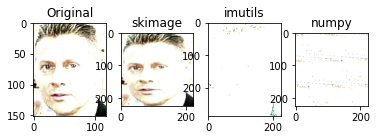

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


***preprocess_input***
type = float64
skimage face shape (resize) = (224, 224, 3)
type = float32
imutils face shape (resize) = (286, 224, 3)
type = float32
numpy face shape (resize) = (224, 224, 3)


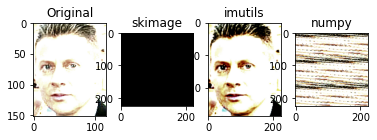

In [22]:
img = imread(without_mask_path+without_mask_listdir[100])
# img_original  = cv2.imread(without_mask_path+without_mask_listdir[1])
# img = np.array(img_original, dtype="float32")
# img = img_to_array(img_original)
print("***img_original***")
print(f"tipo = {img.dtype} {type(img)}")
print(f"max = {img.max()}, min = {img.min()}")
print(f"shape = {img.shape}")

# print("***img_original***")
# print(f"tipo = {img_original.dtype} {type(img_original)}")
# print(f"max = {img_original.max()}, min = {img_original.min()}")
# print(f"shape = {img_original.shape}")


print("***Resize***")
#skimage não distorce e deixa do tamanho correto
face = resize(img,(224, 224,3))
print(f"type = {face.dtype}\nskimage face shape (resize) = {face.shape}")

#imutils não deixa o tamanho exato de 224,224,3
face1 = imutils.resize(img, width=224, height=224 )
print(f"imutils face shape (resize) = {face1.shape}")

#numpy distorce as imagens
face2 = np.resize(img,(224, 224,3))
print(f"numpy face shape (resize) = {face2.shape}")


fig, axs = plt.subplots(1, 4)
# axs[0].imshow(img_original)
axs[0].imshow(img)
axs[0].set_title('Original')

axs[1].imshow(img_to_array(face))
axs[1].set_title(f"skimage")# face shape (resize) = {face.shape}")

axs[2].imshow(img_to_array(face1))
axs[2].set_title(f"imutils")# face shape (resize) = {face1.shape}")

axs[3].imshow(img_to_array(face2))
axs[3].set_title(f"numpy")# face shape (resize) = {face2.shape}")

plt.show()


face3 = mobilenet_v2_preprocess_input(face.copy())
face4 = mobilenet_v2_preprocess_input(face1.copy())
face5 = mobilenet_v2_preprocess_input(face2.copy())


print("***preprocess_input***")
print(f"type = {face3.dtype}\nskimage face shape (resize) = {face3.shape}")
print(f"type = {face4.dtype}\nimutils face shape (resize) = {face4.shape}")
print(f"type = {face5.dtype}\nnumpy face shape (resize) = {face5.shape}")


fig, axs = plt.subplots(1, 4)
# axs[0].imshow(img_original)
axs[0].imshow(img)
axs[0].set_title('Original')

axs[1].imshow(face3)
axs[1].set_title(f"skimage")# face shape (resize) = {face.shape}")

axs[2].imshow(face4)
axs[2].set_title(f"imutils")# face shape (resize) = {face1.shape}")

axs[3].imshow(face5)
axs[3].set_title(f"numpy")# face shape (resize) = {face2.shape}")

plt.show()

# plt.imshow(mobilenet_v2_preprocess_input(face))
# plt.show()


## Realiza o preprocessamento

In [40]:
classes = ["without_mask","mask_weared_incorrect","with_mask"]
labels = []
labels_2_classes = []

# data_mobilenet_v2_preprocess_input_224_224_3 = []
# data_mobilenet_v2_preprocess_input_64_64_3 = []

# data_xception_preprocess_input_224_224_3 = []
# data_xception_preprocess_input_64_64_3 = []

data_vgg16_preprocess_input_224_224_3 = []
data_vgg16_preprocess_input_64_64_3 = []
data_vgg16_preprocess_input_224_224_3_2_classes = []
data_vgg16_preprocess_input_64_64_3_2_classes = []

#### Criar dataset para ser usado no treinamento de uma rede usando transfer learning (preprocess_input sem extrair as features)

In [28]:
def load_resize_and_preprocessing(img_path, nome_comextensao, resize_tupla = (224, 224,3),preprocess_type = "vgg16"):
    #le a imagem com o skimage para não distorcer o padrão RGB
    str_img = img_path+nome_comextensao
#     print(str_img)
    img = imread(str_img)
    #Modifica o tamanho com o resize do skimage para não distorcer a imagem e forçar um tamanho fixo
    face = resize(img,resize_tupla)
    #Agora vamos escolher o preprocess_input desejado
    #vamos usar o .copy() para evitar que preprocess_input não modifique a img original importada
    if preprocess_type == "vgg16":
        return vgg16_preprocess_input(face.copy())
    elif preprocess_type == "mobilenet_v2":
        return mobilenet_v2_preprocess_input(face.copy())
    elif preprocess_type == "xception":
        return xception_preprocess_input(face.copy())


## VGG16

#### Preprocessar primeiro as imagens sem mascara

In [41]:
for imagem in without_mask_listdir:
    print(f"imagem = {imagem}")
    print(f"without_mask_path = {without_mask_path}")
    data_vgg16_preprocess_input_224_224_3.append(load_resize_and_preprocessing(without_mask_path,
                                                                               imagem,
                                                                               resize_tupla = (224, 224,3),
                                                                               preprocess_type = "vgg16"))
    data_vgg16_preprocess_input_64_64_3.append(load_resize_and_preprocessing(without_mask_path,
                                                                             imagem,
                                                                             resize_tupla = (64, 64,3),
                                                                             preprocess_type = "vgg16"))
    data_vgg16_preprocess_input_224_224_3_2_classes.append(load_resize_and_preprocessing(without_mask_path,
                                                                                         imagem,
                                                                                         resize_tupla = (224, 224,3),
                                                                                         preprocess_type = "vgg16"))
    data_vgg16_preprocess_input_64_64_3_2_classes.append(load_resize_and_preprocessing(without_mask_path,
                                                                                       imagem,
                                                                                       resize_tupla = (64, 64,3),
                                                                                       preprocess_type = "vgg16"))
    labels.append("without_mask")
    labels_2_classes.append("without_mask")

imagem = without_mask_1.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_10.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_100.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1000.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1000_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1000_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1001.png
without_mask_path = C:\Users\wesle

imagem = without_mask_1015_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1015_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1016.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1016_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1016_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1017.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1017_fil

imagem = without_mask_1031_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1032.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1032_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1032_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1033.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1033_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1033_fil

imagem = without_mask_1048_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1049.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1049_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1049_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_104_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_104_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = wit

imagem = without_mask_1064_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1064_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1065.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1065_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1065_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1066.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1066_fil

imagem = without_mask_1080_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1081.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1081_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1081_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1082.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1082_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1082_fil

imagem = without_mask_1098_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1098_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1099.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1099_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1099_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_109_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_

imagem = without_mask_1113.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1113_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1113_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1114.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1114_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1114_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1115.png

imagem = without_mask_1129_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1129_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_112_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_112_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_113.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1130.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1130_filter

imagem = without_mask_1145_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1146.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1146_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1146_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1147.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1147_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1147_fil

imagem = without_mask_1160_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1161.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1161_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1161_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1162.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1162_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1162_fil

imagem = without_mask_1177_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1177_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1178.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1178_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1178_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1179.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1179_fil

imagem = without_mask_1194.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1194_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1194_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1195.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1195_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1195_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1196.png

imagem = without_mask_1209_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1209_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_120_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_120_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_121.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1210.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1210_filter

imagem = without_mask_1225_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1225_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1226.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1226_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1226_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1227.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1227_fil

imagem = without_mask_1242_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1242_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1243.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1243_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1243_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1244.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1244_fil

imagem = without_mask_125_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_126.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1260.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1260_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1260_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1261.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1261_filtered.png
w

imagem = without_mask_1277_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1278.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1278_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1278_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1279.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1279_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1279_fil

imagem = without_mask_1294_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1295.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1295_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1295_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1296.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1296_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1296_fil

imagem = without_mask_1309_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_130_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_130_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_131.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1310.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1310_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1310_filter

imagem = without_mask_1326_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1326_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1327.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1327_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1327_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1328.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1328_fil

imagem = without_mask_1343_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1343_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1344.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1344_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1344_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1345.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1345_fil

imagem = without_mask_1360_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1360_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1361.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1361_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1361_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1362.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1362_fil

imagem = without_mask_1376_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1377.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1377_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1377_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1378.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1378_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1378_fil

imagem = without_mask_1394_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1394_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1395.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1395_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1395_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1396.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1396_fil

imagem = without_mask_1410_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1410_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1411.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1411_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1411_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1412.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1412_fil

imagem = without_mask_1427_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1427_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1428.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1428_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1428_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1429.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1429_fil

imagem = without_mask_1444.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1444_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1444_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1445.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1445_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1445_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1446.png

imagem = without_mask_1460_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1460_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1461.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1461_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1461_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1462.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1462_fil

without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1478.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1478_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1478_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1479.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1479_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1479_filtered_FIND_EDGES.png
without_mask_path = C:\Users\w

imagem = without_mask_1496.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1496_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1496_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1497.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1497_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1497_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1498.png

imagem = without_mask_1513_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1514.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1514_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1514_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1515.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1515_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1515_fil

without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1532.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1532_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1532_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1533.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1533_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1533_filtered_FIND_EDGES.png
without_mask_path = C:\Users\w

imagem = without_mask_1549_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1550.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1550_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1550_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1551.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1551_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1551_fil

imagem = without_mask_1567.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1567_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1567_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1568.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1568_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1568_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1569.png

imagem = without_mask_1584_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1585.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1585_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1585_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1586.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1586_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1586_fil

imagem = without_mask_15_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_15_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_16.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_160.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1600.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1600_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1600_filtered_FIND_EDGES.png
withou

imagem = without_mask_1616_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1617.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1617_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1617_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1618.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1618_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1618_fil

imagem = without_mask_1633_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1633_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1634.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1634_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1634_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1635.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1635_fil

imagem = without_mask_164_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_165.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1650.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1650_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1650_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1651.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1651_filtered.png
w

imagem = without_mask_1666_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1667.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1667_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1667_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1668.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1668_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1668_fil

imagem = without_mask_1683_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1684.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1684_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1684_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1685.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1685_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1685_fil

imagem = without_mask_16_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_16_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_17.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_170.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1700.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1700_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1700_filtered_FIND_EDGES.png
withou

imagem = without_mask_1716.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1716_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1716_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1717.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1717_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1717_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1718.png

imagem = without_mask_1732.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1732_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1732_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1733.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1733_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1733_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1734.png

imagem = without_mask_174_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_174_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1750.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1750_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1750_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1751.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1751_filte

imagem = without_mask_1767_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1768.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1768_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1768_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1769.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1769_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1769_fil

imagem = without_mask_1784_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1784_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1785.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1785_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1785_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1786.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1786_fil

imagem = without_mask_179_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_17_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_17_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_18.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_180.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1800.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1800_filtered.png
without

imagem = without_mask_1815_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1815_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1816.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1816_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1816_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1817.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1817_fil

imagem = without_mask_1831_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1831_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1832.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1832_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1832_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1833.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1833_fil

imagem = without_mask_1848_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1849.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1849_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1849_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_184_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_184_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = wit

imagem = without_mask_1865.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1865_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1865_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1866.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1866_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1866_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1867.png

imagem = without_mask_1880_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1881.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1881_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1881_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1882.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1882_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1882_fil

imagem = without_mask_1897_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1898.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1898_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1898_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1899.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1899_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1899_fil

imagem = without_mask_1913_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1914.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1914_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1914_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1915.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1915_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1915_fil

imagem = without_mask_193.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1930.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1930_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1930_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1931.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1931_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1931_filtered_FIND_EDGES.png


imagem = without_mask_1947_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1947_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1948.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1948_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1948_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1949.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1949_fil

imagem = without_mask_1963.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1963_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1963_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1964.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1964_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1964_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1965.png

imagem = without_mask_197_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_198.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1980.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1980_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1980_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1981.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1981_filtered.png
w

imagem = without_mask_1996_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1997.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1997_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1997_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1998.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1998_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_1998_fil

imagem = without_mask_2010_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2010_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2011.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2011_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2011_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2012.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2012_fil

imagem = without_mask_2027.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2027_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2027_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2028.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2028_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2028_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2029.png

imagem = without_mask_2042.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2042_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2042_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2043.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2043_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2043_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2044.png

imagem = without_mask_2059_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2059_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_205_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_205_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_206.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2060.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2060_filter

imagem = without_mask_2075_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2075_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2076.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2076_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2076_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2077.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2077_fil

imagem = without_mask_2091.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2091_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2091_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2092.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2092_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2092_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2093.png

imagem = without_mask_2106_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2106_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2107.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2107_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2107_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2108.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2108_fil

imagem = without_mask_2122.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2122_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2122_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2123.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2123_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2123_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2124.png

imagem = without_mask_2138_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2139.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2139_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2139_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_213_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_213_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = wit

imagem = without_mask_2155_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2155_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2156.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2156_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2156_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2157.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2157_fil

imagem = without_mask_2173.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2173_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2173_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2174.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2174_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2174_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2175.png

imagem = without_mask_2190.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2190_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2190_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2191.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2191_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2191_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2192.png

imagem = without_mask_2206_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2206_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2207.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2207_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2207_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2208.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2208_fil

imagem = without_mask_2222.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2222_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2222_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2223.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2223_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2223_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2224.png

imagem = without_mask_2238_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2238_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2239.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2239_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2239_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_224.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2240.png


imagem = without_mask_2254_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2255.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2255_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2255_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2256.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2256_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2256_fil

imagem = without_mask_2270_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2271.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2271_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2271_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2272.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2272_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2272_fil

imagem = without_mask_2288_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2289.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2289_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2289_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_229.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2290.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2290_filtered.png


imagem = without_mask_2304_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2305.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2305_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2305_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2306.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2306_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2306_fil

imagem = without_mask_2320_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2320_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2321.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2321_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2321_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2322.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2322_fil

imagem = without_mask_2337.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2337_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2337_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2338.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2338_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2338_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2339.png

imagem = without_mask_2352_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2352_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2353.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2353_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2353_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2354.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2354_fil

imagem = without_mask_2370_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2370_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2371.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2371_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2371_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2372.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2372_fil

imagem = without_mask_2389.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2389_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2389_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2390.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2390_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2390_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2391.png

imagem = without_mask_2406_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2406_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2407.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2407_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2407_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2408.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2408_fil

imagem = without_mask_2423_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2423_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2424.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2424_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2424_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2425.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2425_fil

imagem = without_mask_2439_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_243_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_243_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2440.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2440_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2440_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = wit

imagem = without_mask_2456_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2456_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2457.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2457_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2457_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2458.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2458_fil

imagem = without_mask_2471_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2472.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2472_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2472_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2473.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2473_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2473_fil

imagem = without_mask_2487_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2488.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2488_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2488_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2489.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2489_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2489_fil

imagem = without_mask_2501_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2502.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2502_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2502_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2503.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2503_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2503_fil

imagem = without_mask_2519.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2519_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2519_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2520.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2520_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2520_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2521.png

imagem = without_mask_2536_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2537.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2537_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2537_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2538.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2538_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2538_fil

imagem = without_mask_2552_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2553.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2553_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2553_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2554.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2554_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2554_fil

imagem = without_mask_2570.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2570_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2570_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2571.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2571_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2571_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2572.png

imagem = without_mask_2587_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2588.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2588_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2588_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2589.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2589_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2589_fil

imagem = without_mask_2602_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2603.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2603_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2603_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2604.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2604_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_2604_fil

imagem = without_mask_262_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_262_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_265.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_265_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_265_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_269.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_269_filtered.p

imagem = without_mask_290_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_291.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_291_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_291_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_293.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_293_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_293_filtered_F

imagem = without_mask_318.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_318_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_318_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_319.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_319_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_319_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_31_filtered.pn

imagem = without_mask_36_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_37.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_37_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_37_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_38.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_38_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_38_filtered_FIND_EDG

imagem = without_mask_417_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_418.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_418_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_418_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_419.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_419_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_419_filtered_F

imagem = without_mask_45_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_45_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_46.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_464.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_464_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_464_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_466.png
without_m

imagem = without_mask_495_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_496.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_496_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_496_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_497.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_497_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_497_filtered_F

imagem = without_mask_524.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_524_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_524_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_528.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_528_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_528_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_52_filtered.pn

imagem = without_mask_556_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_556_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_557.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_557_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_557_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_559.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_559_filtered.p

imagem = without_mask_6.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_600.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_600_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_600_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_605.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_605_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_605_filtered_FIND_EDGES.png
without_

imagem = without_mask_644.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_644_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_644_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_645.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_645_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_645_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_646.png
withou

imagem = without_mask_684_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_684_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_685.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_685_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_685_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_68_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_68_fil

imagem = without_mask_726.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_726_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_726_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_72_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_72_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_73.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_73_filtered.png
w

imagem = without_mask_774_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_775.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_775_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_775_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_776.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_776_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_776_filtered_F

imagem = without_mask_80_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_80_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_81.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_810.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_810_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_810_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_811.png
without_m

imagem = without_mask_828.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_828_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_828_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_82_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_82_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_83.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_830.png
without_m

imagem = without_mask_87_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_88.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_884.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_884_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_884_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_885.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_885_filtered.png
without_

imagem = without_mask_902_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_907.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_907_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_907_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_90_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_90_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_m

imagem = without_mask_929_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_929_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_92_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_92_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_93.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_930.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_930_filtered.png


imagem = without_mask_945.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_945_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_945_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_946.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_946_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_946_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_947.png
withou

imagem = without_mask_960_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_960_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_961.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_961_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_961_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_962.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_962_filtered.p

imagem = without_mask_977_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_977_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_978.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_978_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_978_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_979.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_979_filtered.p

imagem = without_mask_995_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_995_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_996.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_996_filtered.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_996_filtered_FIND_EDGES.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_997.png
without_mask_path = C:\Users\wesle\Documents\TensorFlow\workspace\training_demo\images\only_faces\balanced\without_mask\
imagem = without_mask_997_filtered.p

In [43]:
print(len(data_vgg16_preprocess_input_64_64_3_2_classes[0]))
print(type(data_vgg16_preprocess_input_64_64_3_2_classes[0]))
print(data_vgg16_preprocess_input_64_64_3_2_classes[0].dtype)

64
<class 'numpy.ndarray'>
float64


#### Preprocessar agora as imagens com mascara errada

In [30]:
for imagem in mask_weared_incorrect_listdir:
    data_vgg16_preprocess_input_224_224_3.append(load_resize_and_preprocessing(mask_weared_incorrect_path,
                                                                               imagem,
                                                                               resize_tupla = (224, 224,3),
                                                                               preprocess_type = "vgg16"))
    data_vgg16_preprocess_input_64_64_3.append(load_resize_and_preprocessing(mask_weared_incorrect_path,
                                                                             imagem,
                                                                             resize_tupla = (64, 64,3),
                                                                             preprocess_type = "vgg16"))
    labels.append("mask_weared_incorrect")

#### Preprocessar agora as imagens com mascara correta

In [31]:
for imagem in with_mask_listdir:
    data_vgg16_preprocess_input_224_224_3.append(load_resize_and_preprocessing(with_mask_path,
                                                                               imagem,
                                                                               resize_tupla = (224, 224,3),
                                                                               preprocess_type = "vgg16"))
    data_vgg16_preprocess_input_64_64_3.append(load_resize_and_preprocessing(with_mask_path,
                                                                             imagem,
                                                                             resize_tupla = (64, 64,3),
                                                                             preprocess_type = "vgg16"))
    data_vgg16_preprocess_input_224_224_3_2_classes.append(load_resize_and_preprocessing(with_mask_path,
                                                                                         imagem,
                                                                                         resize_tupla = (224, 224,3),
                                                                                         preprocess_type = "vgg16"))
    data_vgg16_preprocess_input_64_64_3_2_classes.append(load_resize_and_preprocessing(with_mask_path,
                                                                                       imagem,
                                                                                       resize_tupla = (64, 64,3),
                                                                                       preprocess_type = "vgg16"))
    labels.append("with_mask")
    labels_2_classes.append("with_mask")

In [32]:
print(f"tamanho = {len(data_vgg16_preprocess_input_224_224_3)} e tipo = {type(data_vgg16_preprocess_input_224_224_3)}, elementos_shape = {data_vgg16_preprocess_input_224_224_3[0].shape}, elementos_dtype = {data_vgg16_preprocess_input_224_224_3[0].dtype}")
print(f"tamanho = {len(data_vgg16_preprocess_input_64_64_3)} e tipo = {type(data_vgg16_preprocess_input_64_64_3)}, elementos_shape = {data_vgg16_preprocess_input_64_64_3[0].shape}, elementos_dtype = {data_vgg16_preprocess_input_64_64_3[0].dtype}")

tamanho = 21744 e tipo = <class 'list'>, elementos_shape = (224, 224, 3), elementos_dtype = float64
tamanho = 21744 e tipo = <class 'list'>, elementos_shape = (64, 64, 3), elementos_dtype = float64


In [33]:
data_vgg16_preprocess_input_224_224_3 = np.array(data_vgg16_preprocess_input_224_224_3,
                                                 dtype="float32")
np.save(bases_prontas_path+"mask_dataset_vgg16_preprocess_input_224_224_3.npy",
        data_vgg16_preprocess_input_224_224_3)

data_vgg16_preprocess_input_64_64_3 = np.array(data_vgg16_preprocess_input_64_64_3, 
                                               dtype="float32")
np.save(bases_prontas_path+"mask_dataset_vgg16_preprocess_input_64_64_3.npy",
        data_vgg16_preprocess_input_64_64_3)

data_vgg16_preprocess_input_224_224_3_2_classes = np.array(data_vgg16_preprocess_input_224_224_3_2_classes,
                                                           dtype="float32")
np.save(bases_prontas_path+"mask_dataset_vgg16_preprocess_input_224_224_3_2_categorias.npy",
        data_vgg16_preprocess_input_224_224_3)

data_vgg16_preprocess_input_64_64_3_2_classes = np.array(data_vgg16_preprocess_input_64_64_3_2_classes,
                                                         dtype="float32")
np.save(bases_prontas_path+"mask_dataset_vgg16_preprocess_input_64_64_3_2_categorias.npy",
        data_vgg16_preprocess_input_64_64_3)



## Salvar os Labels 

In [34]:
# print(labels)
lb = LabelEncoder()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
print(labels)
print(lb.classes_)
labels = np.array(labels, dtype="float32")
np.save(bases_prontas_path+"mask_dataset_labels.npy",labels)

lb2 = LabelEncoder()
labels_2_classes = lb2.fit_transform(labels_2_classes)
labels_2_classes = to_categorical(labels_2_classes)
print(labels_2_classes)
print(lb2.classes_)
labels_2_classes = np.array(labels_2_classes, dtype="float32")
np.save(bases_prontas_path+"mask_dataset_labels_2_categorias.npy",labels_2_classes)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
['mask_weared_incorrect' 'with_mask' 'without_mask']
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
['with_mask' 'without_mask']


## mobilenet_v2

In [ ]:
data_mobilenet_v2_preprocess_input_224_224_3 = []
data_mobilenet_v2_preprocess_input_64_64_3 = []
#zerar os dados anteriores para evitar estourar a memória
data_vgg16_preprocess_input_224_224_3 = []
data_vgg16_preprocess_input_64_64_3 = []

In [ ]:
for imagem in without_mask_listdir:
#     print(without_mask_path+imagem)
    data_mobilenet_v2_preprocess_input_224_224_3.append(load_resize_and_preprocessing(without_mask_path,
                                                                                      imagem,
                                                                                      resize_tupla = (224, 224,3),
                                                                                      preprocess_type = "mobilenet_v2"))
    data_mobilenet_v2_preprocess_input_64_64_3.append(load_resize_and_preprocessing(without_mask_path,
                                                                                    imagem,
                                                                                    resize_tupla = (64, 64,3),
                                                                                    preprocess_type = "mobilenet_v2"))

In [ ]:
for imagem in mask_weared_incorrect_listdir:
    data_mobilenet_v2_preprocess_input_224_224_3.append(load_resize_and_preprocessing(mask_weared_incorrect_path,
                                                                                      imagem,
                                                                                      resize_tupla = (224, 224,3),
                                                                                      preprocess_type = "mobilenet_v2"))
    data_mobilenet_v2_preprocess_input_64_64_3.append(load_resize_and_preprocessing(mask_weared_incorrect_path,
                                                                                    imagem,
                                                                                    resize_tupla = (64, 64,3),
                                                                                    preprocess_type = "mobilenet_v2"))

In [ ]:
for imagem in with_mask_listdir:
    data_mobilenet_v2_preprocess_input_224_224_3.append(load_resize_and_preprocessing(with_mask_path,
                                                                                      imagem,
                                                                                      resize_tupla = (224, 224,3),
                                                                                      preprocess_type = "mobilenet_v2"))
    data_mobilenet_v2_preprocess_input_64_64_3.append(load_resize_and_preprocessing(with_mask_path,
                                                                                    imagem,
                                                                                    resize_tupla = (64, 64,3),
                                                                                    preprocess_type = "mobilenet_v2"))

In [ ]:
print(f"tamanho = {len(data_mobilenet_v2_preprocess_input_224_224_3)} e tipo = {type(data_mobilenet_v2_preprocess_input_224_224_3)}, elementos_shape = {data_mobilenet_v2_preprocess_input_224_224_3[0].shape}, elementos_dtype = {data_mobilenet_v2_preprocess_input_224_224_3[0].dtype}")
print(f"tamanho = {len(data_mobilenet_v2_preprocess_input_64_64_3)} e tipo = {type(data_mobilenet_v2_preprocess_input_64_64_3)}, elementos_shape = {data_mobilenet_v2_preprocess_input_64_64_3[0].shape}, elementos_dtype = {data_mobilenet_v2_preprocess_input_64_64_3[0].dtype}")

In [ ]:
data_mobilenet_v2_preprocess_input_224_224_3 = np.array(data_mobilenet_v2_preprocess_input_224_224_3,
                                                        dtype="float32")
np.save(bases_prontas_path+"mask_dataset_mobilenet_v2_preprocess_input_224_224_3_2_categorias.npy",
        data_mobilenet_v2_preprocess_input_224_224_3)

data_mobilenet_v2_preprocess_input_64_64_3 = np.array(data_mobilenet_v2_preprocess_input_64_64_3, 
                                                      dtype="float32")
np.save(bases_prontas_path+"mask_dataset_mobilenet_v2_preprocess_input_64_64_3_2_categorias.npy",
        data_mobilenet_v2_preprocess_input_64_64_3)

## xception

In [ ]:
data_xception_preprocess_input_224_224_3 = []
data_xception_preprocess_input_64_64_3 = []
#zerar os dados anteriores para evitar estourar a memória
data_mobilenet_v2_preprocess_input_224_224_3 = []
data_mobilenet_v2_preprocess_input_64_64_3 = []


In [ ]:
for imagem in without_mask_listdir:
#     print(without_mask_path+imagem)
    data_xception_preprocess_input_224_224_3.append(load_resize_and_preprocessing(without_mask_path,
                                                                                  imagem,
                                                                                  resize_tupla = (224, 224,3),
                                                                                  preprocess_type = "xception"))
    data_xception_preprocess_input_64_64_3.append(load_resize_and_preprocessing(without_mask_path,
                                                                                imagem,
                                                                                resize_tupla = (64, 64,3),
                                                                                preprocess_type = "xception"))

In [ ]:
for imagem in mask_weared_incorrect_listdir:
    data_xception_preprocess_input_224_224_3.append(load_resize_and_preprocessing(mask_weared_incorrect_path,
                                                                                  imagem,
                                                                                  resize_tupla = (224, 224,3),
                                                                                  preprocess_type = "xception"))
    data_xception_preprocess_input_64_64_3.append(load_resize_and_preprocessing(mask_weared_incorrect_path,
                                                                                imagem,
                                                                                resize_tupla = (64, 64,3),
                                                                                preprocess_type = "xception"))

In [ ]:
for imagem in with_mask_listdir:
    data_xception_preprocess_input_224_224_3.append(load_resize_and_preprocessing(with_mask_path,
                                                                                  imagem,
                                                                                  resize_tupla = (224, 224,3),
                                                                                  preprocess_type = "xception"))
    data_xception_preprocess_input_64_64_3.append(load_resize_and_preprocessing(with_mask_path,
                                                                                imagem,
                                                                                resize_tupla = (64, 64,3),
                                                                                preprocess_type = "xception"))

In [ ]:
print(f"tamanho = {len(data_xception_preprocess_input_224_224_3)} e tipo = {type(data_xception_preprocess_input_224_224_3)}, elementos_shape = {data_xception_preprocess_input_224_224_3[0].shape}, elementos_dtype = {data_xception_preprocess_input_224_224_3[0].dtype}")
print(f"tamanho = {len(data_xception_preprocess_input_64_64_3)} e tipo = {type(data_xception_preprocess_input_64_64_3)}, elementos_shape = {data_xception_preprocess_input_64_64_3[0].shape}, elementos_dtype = {data_xception_preprocess_input_64_64_3[0].dtype}")

In [ ]:
data_xception_preprocess_input_224_224_3 = np.array(data_xception_preprocess_input_224_224_3, dtype="float32")
np.save(bases_prontas_path+"mask_dataset_xception_preprocess_input_224_224_3_2_categorias.npy",data_xception_preprocess_input_224_224_3)

data_xception_preprocess_input_64_64_3 = np.array(data_xception_preprocess_input_64_64_3, dtype="float32")
np.save(bases_prontas_path+"mask_dataset_xception_preprocess_input_64_64_3_2_categorias.npy",data_xception_preprocess_input_64_64_3)

## Extrair features das imagens com vgg16

#### Criar dataset para ser usado no treinamento de modelos tradicionais como Reg Log e Randon forest

In [13]:
def feature_extraction(img_pre_processada):
    vgg16_features = vgg16.VGG16(weights='imagenet', 
                                 include_top=False, 
                                 pooling='max',
                                 input_tensor=Input(shape=(224, 224, 3)))
    features = vgg16_features.predict(img_pre_processada).reshape(-1)
    return features.tolist()

def load_resize_and_preprocessing_feature_extraction(img_path, nome_comextensao, resize_tupla = (224, 224,3),preprocess_type = "vgg16"):
    #le a imagem com o skimage para não distorcer o padrão RGB
    str_img = img_path+nome_comextensao
#     print(str_img)
    img = imread(str_img)
    #Modifica o tamanho com o resize do skimage para não distorcer a imagem e forçar um tamanho fixo
    face = resize(img,resize_tupla)
    #Agora vamos escolher o preprocess_input desejado
    #vamos usar o .copy() para evitar que preprocess_input não modifique a img original importada
    face = vgg16_preprocess_input(face.copy())
    vgg16_features = vgg16.VGG16(weights='imagenet', 
                                 include_top=False, 
                                 pooling='max')#,
                                 #input_tensor=Input(shape=(224, 224, 3)))
    features = vgg16_features.predict(face).reshape(-1)
    return features.tolist()

In [30]:
# data_vgg16_preprocess_input_224_224_3 = []
data_vgg16_preprocess_input_224_224_3 = np.load(bases_prontas_path+'mask_dataset_vgg16_preprocess_input_224_224_3.npy')
#data_vgg16_preprocess_input_64_64_3 = np.load(bases_prontas_path+'labels_to_categorical.npy')
dataset_vgg16_preprocess_input_224_224_3_feature_extracted = []

In [36]:
# for imagem in data_vgg16_preprocess_input_224_224_3:
# #     print(imagem.shape)
# #     print(type(imagem))
# #     print(imagem.dtype)
#     imagem = np.array(imagem.copy(), dtype="float32")
#     imagem = imagem.reshape(1,224, 224,3) 
aux = feature_extraction(data_vgg16_preprocess_input_224_224_3)
dataset_vgg16_preprocess_input_224_224_3_feature_extracted.append(aux)
time.sleep(10)

ResourceExhaustedError: OOM when allocating tensor with shape[3,3,64,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Add] name: block2_conv1_111/kernel/Initializer/random_uniform/

In [ ]:
# for imagem in without_mask_listdir:
#     data_vgg16_preprocess_input_224_224_3.append(load_resize_and_preprocessing_feature_extraction(without_mask_path,
#                                                                                                   imagem,
#                                                                                                   resize_tupla = (224, 224,3),
#                                                                                                   preprocess_type = "vgg16"))
    
# for imagem in mask_weared_incorrect_listdir:
#     data_vgg16_preprocess_input_224_224_3.append(load_resize_and_preprocessing_feature_extraction(mask_weared_incorrect_path,
#                                                                                                   imagem,
#                                                                                                   resize_tupla = (224, 224,3),
#                                                                                                   preprocess_type = "vgg16"))
    
# for imagem in with_mask_listdir:
#     data_vgg16_preprocess_input_224_224_3.append(load_resize_and_preprocessing_feature_extraction(with_mask_path,
#                                                                                                   imagem,
#                                                                                                   resize_tupla = (224, 224,3),
#                                                                                                   preprocess_type = "vgg16"))

In [33]:
len(dataset_vgg16_preprocess_input_224_224_3_feature_extracted)

0

In [18]:
dataset_vgg16_preprocess_input_224_224_3_feature_extracted = np.array(dataset_vgg16_preprocess_input_224_224_3_feature_extracted, dtype="float32")
np.save(bases_prontas_path+"mask_dataset_vgg16_preprocess_input_224_224_3_feature_extracted.npy",dataset_vgg16_preprocess_input_224_224_3_feature_extracted)


In [26]:
!nvidia-smi 

Fri Sep 11 14:20:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 451.67       Driver Version: 451.67       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 107... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8    11W /  N/A |   6838MiB /  8192MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  